<a href="https://colab.research.google.com/github/Wanyoike16/Project-1/blob/main/MODEL_DEVELOPMENT_WITH_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Developing prediction models**

We use model developemntt to help us predict future observations from the data we have.

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# we now load the data and store it in dataframe df
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


**Linear Regression and Multiple Linear Regression**

In [5]:
#lets laod the modulles for linear regression
from sklearn.linear_model import LinearRegression

In [6]:
# we create the linear regression object
lm = LinearRegression()
lm

LinearRegression()

How could 'highway-mpg' help us predic car price

In [7]:
#we will create a linear function with 'highway-mpg' as the prdictor variable and the price as the response variable
X = df[['highway-mpg']]
Y= df['price']

In [8]:
#we fit the linear model using highway-mpg
lm.fit(X,Y)

LinearRegression()

In [11]:
# we output a prediction
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

What is the value of the intercept (a)?

In [12]:
lm.intercept_

38423.3058581574

In [13]:
#the value of the slobe (b)
lm.coef_

array([-821.73337832])

The final linear model we get is:  Price = 38423.31-821.73 x highway-mpg

In [14]:
#lets create a linear regression object called 'lm1'
lm1 = LinearRegression()
lm1

LinearRegression()

In [15]:
# lets train the model using 'engine-size' as the independent variable and 'price' as the dependent variable
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [16]:
#we find the slope and the intercept of the model
lm1.coef_

array([[166.86001569]])

In [17]:
#then we find the intercept
lm1.intercept_

array([-7963.33890628])

In [18]:
#lets find the equation of the predicted line
 Yhat= -7963.34 + 166.86*X

 Price= -7963.34 + 166.86*engine-size

IndentationError: unexpected indent (<ipython-input-18-14e04bb85e90>, line 2)

Muiltiple Linear Regression

In [19]:
# we develop a model using, horsepower, curb-weight, engine-size, highway-mpg variables as predictor variables
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [20]:
#lets fit the linear model using the four above variables
lm.fit(Z, df['price'])

LinearRegression()

In [21]:
#value of intercept a
lm.intercept_

-15806.62462632922

In [22]:
#vale of coeficients, b1,b2,b3,b4
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

the linear function we get is:  Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

In [23]:
#lets create a multiple linear Regression model 'lm2; where the resposne variable is 'price' and the predictor variable is 'normalized-losses' and 'highway-mpg'
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']], df['price'])

LinearRegression()

In [24]:
#we find the coef of the model
lm2.coef_

array([   1.49789586, -820.45434016])

In [25]:
#intercept a
lm2.intercept_

38201.31327245728

**Model Evaluation Using Visualization**

In [26]:
#lets imprt the visualization package seaborn
import seaborn as sns
%matplotlib inline

Regression plot

(0.0, 48154.72049157106)

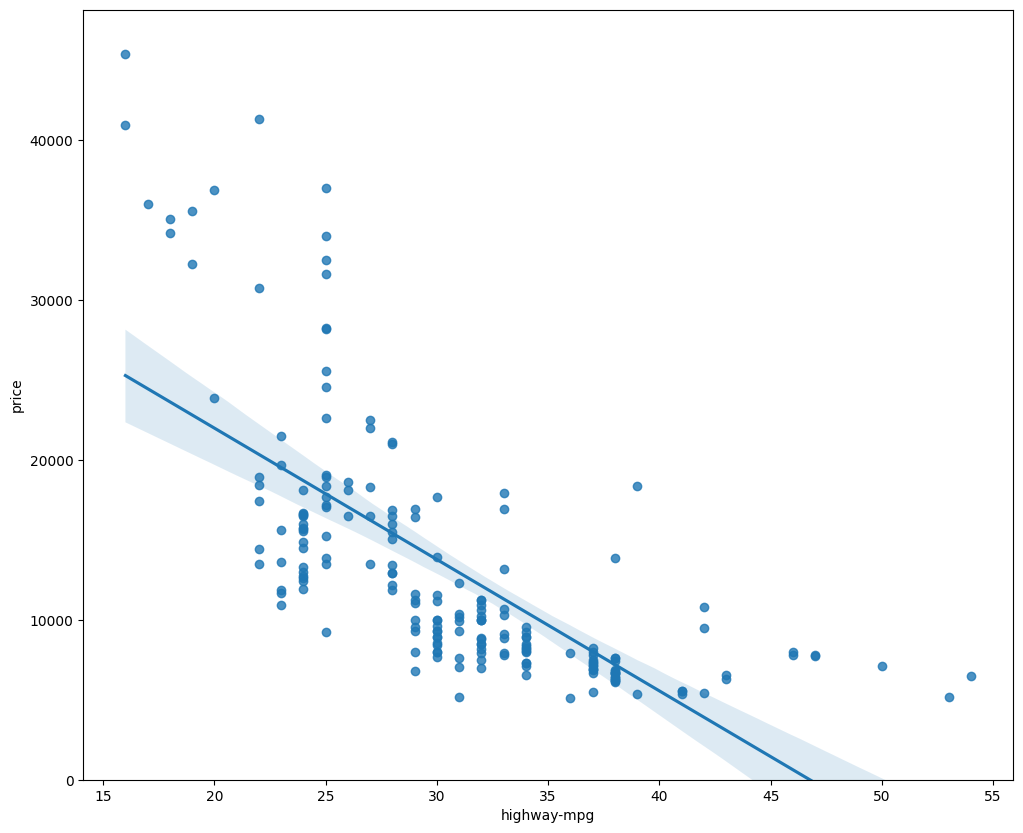

In [27]:
#lets visuailze highway-mpg as potentail predictor varaible of price
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

from this plot we see that price is negatively correlated to highway-mpg.
One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data

(0.0, 47414.1)

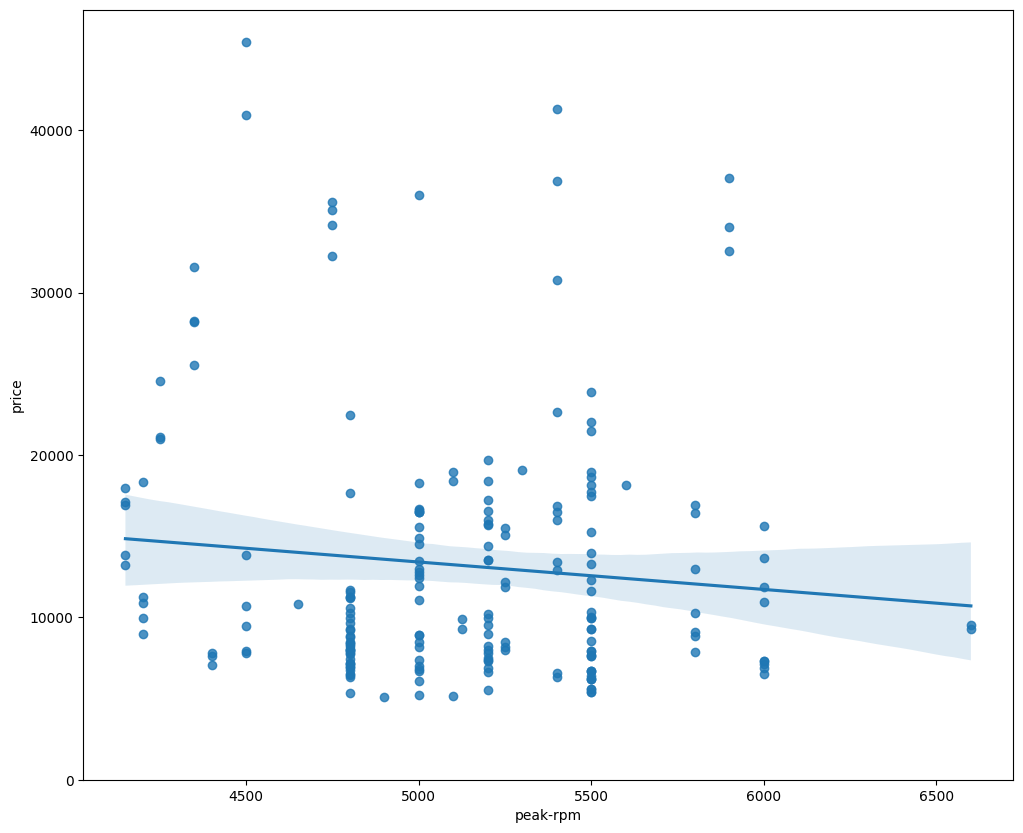

In [29]:
#lets comapre the above plot with the regression plot of 'peak-rpm'
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.

In [31]:
# The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616. we can verify it using the following command:

df[["peak-rpm", "highway-mpg", "price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


**Residual Plot`**
*If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.*

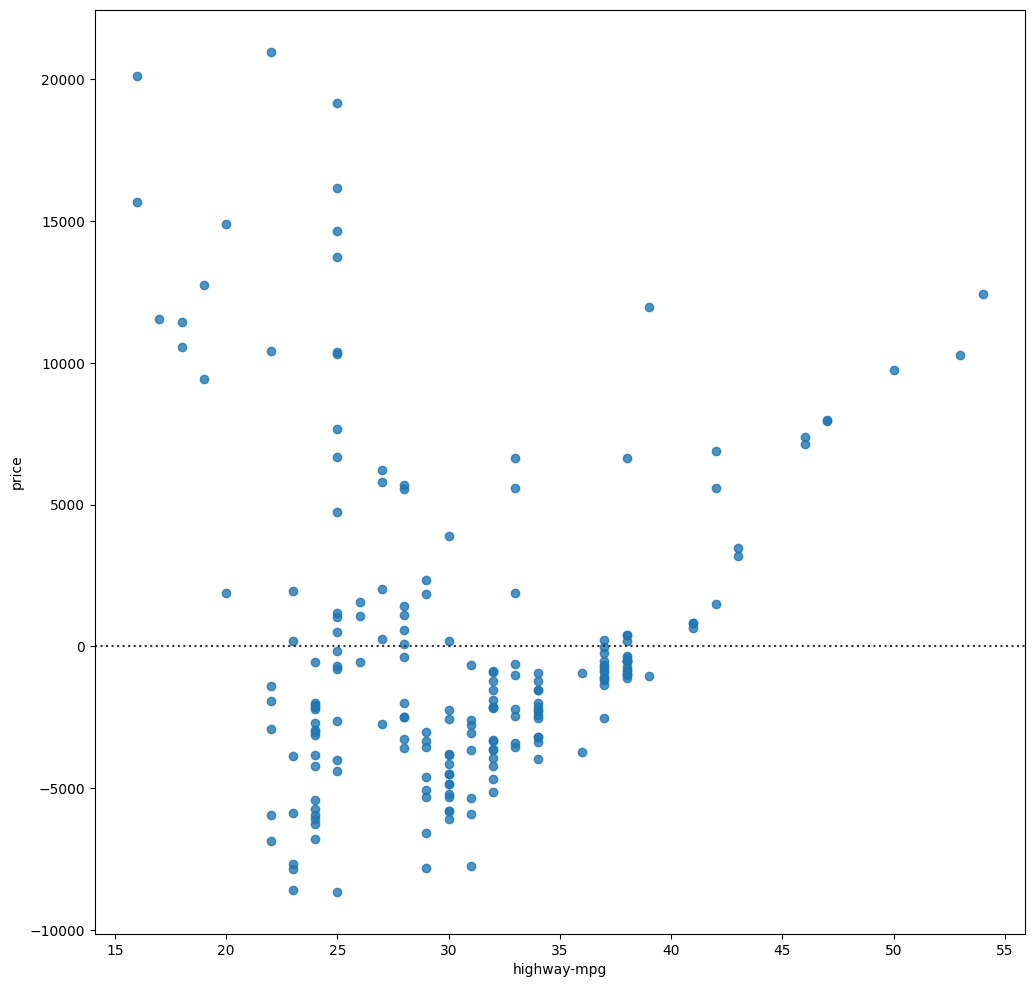

In [32]:
width = 12
height =12
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

*We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.*

**Multiple Linear regression**

In [34]:
#lets make a prediction
Y_hat = lm.predict(Z)

<ipython-input-37-4ce366f857ec>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1= sns.distplot(df['price'], hist=False,color="r",label="Actual Value")


TypeError: distplot() got an unexpected keyword argument 'colr'

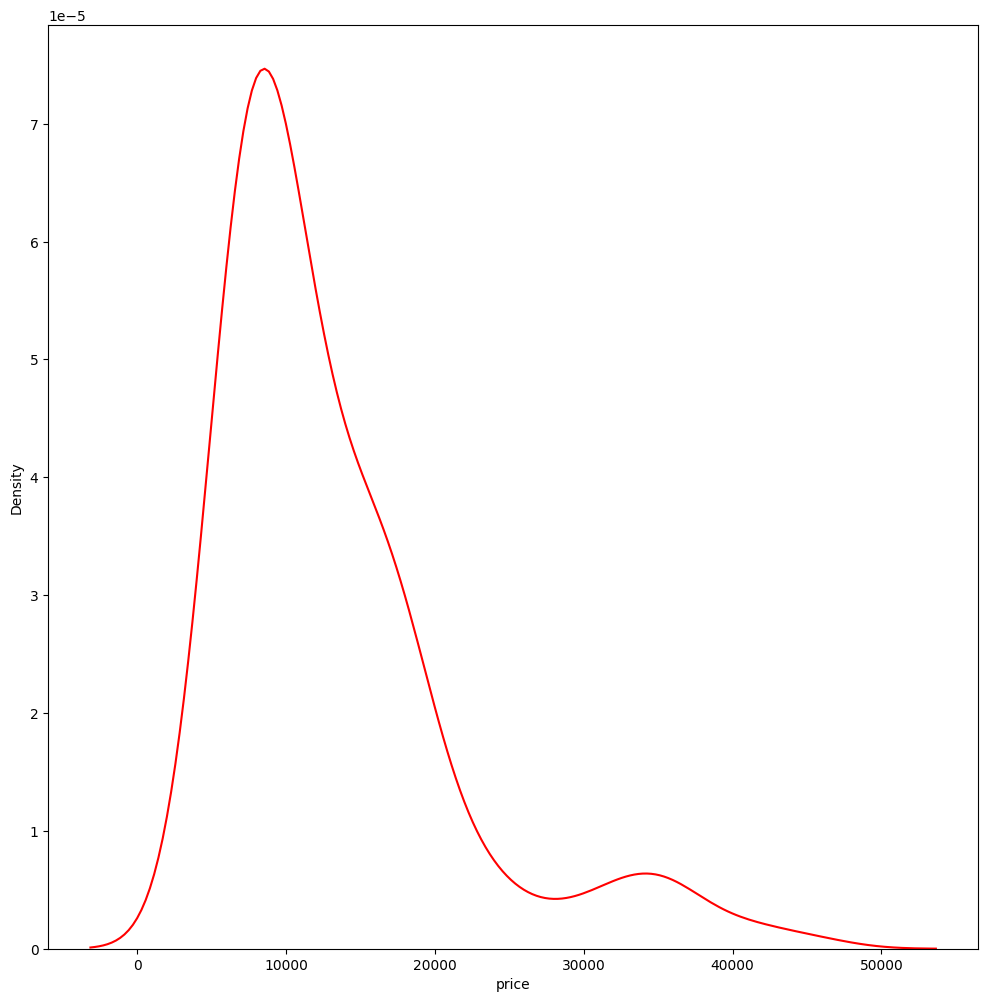

In [37]:
plt.figure(figsize=(width, height))

ax1= sns.distplot(df['price'], hist=False,color="r",label="Actual Value")
sns.distplot(Y_hat, hist=False, colr="b", label="Fitted Values", ax=ax1)

plt.title('actual vs fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proprtiion of cars')

plt.show()
plt.close()

*We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.*

**Polynomial Regression and Pipelines**

In [38]:
def PlotPolly(model, independent_variable, dependent_variable, name):
  x_new = np.linspace(15, 55, 100)
  y_new = model(x_new)

  plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
  plt.title('Polynomial Fit with Matplotlib for Price ~ length')
  ax = plt.gca()
  ax.set_faceclor((0.898, 0.898, 0.898))
  fig = plt.gcf()
  plt.xlabel('Price of Cars')

  plt.show()
  plt.close()


In [39]:
# we get the variables
x = df['highway-mpg']
y = df['price']

In [42]:
# we fit the polynomial using the function ployfit, the use ply1d to dsiaply the polynomail function
# we use a polynomial of the 3rd order(cubic)
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


AttributeError: 'Axes' object has no attribute 'set_faceclor'

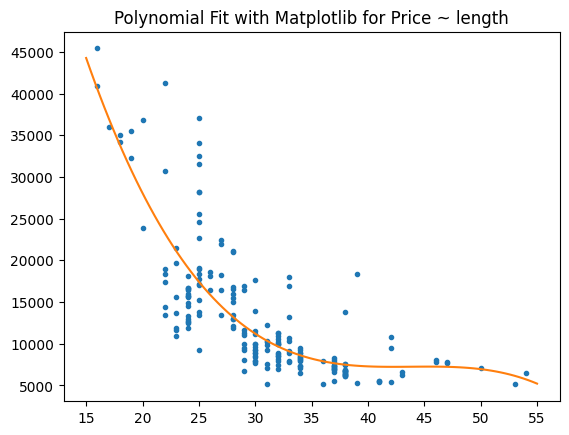

In [45]:
#the we plot the function
PlotPolly(p, x, y, 'highway-mpg')

In [46]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [47]:
# we can create 11 order polynommial model with the varaibles x and y from above

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


AttributeError: 'Axes' object has no attribute 'set_faceclor'

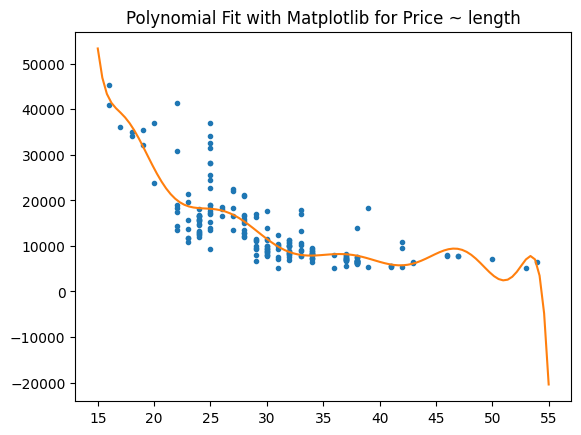

In [50]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [52]:
# we can perfom a polynomial transform on multiple features, we fisrt import the module
from sklearn.preprocessing import PolynomialFeatures

In [53]:
#we create a polynomialFeatures object of degree 2
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [55]:
z_pr=pr.fit_transform(Z)

In [56]:
#in the original data, there are 201 samples and 4 feature
Z.shape

(201, 4)

In [60]:
#after the transformation there are 201 samples and 15 features
z_pr.shape

(201, 15)

**PIPELINE**

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [65]:
#we create the pipeline by creating a lsit of tuples including the name of the model or estimator and its corresponding constructor

Input= [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

In [67]:
# we input the lsit as an arguement to the pipeline constructor
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [69]:
# we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs then, we can normalize the data, perform a transform and fit the model simultaneously

Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [71]:
#we can also normalize the dat, perfom a transform and produce a prediction simultaneosly
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

**Measures for In-Sample Evaluation**


Model 1: Simple Linear Regression

In [72]:
#lets calaculate the R^2
lm.fit(X, Y)
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [73]:
#lets calculate the MSE
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [74]:
#lets import the function mean_squared_error fromthe module metreics
from sklearn.metrics import mean_squared_error

In [76]:
#lets comapre the predicted results with the actual results
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


Model 2: Multiple Linear Regression

In [77]:
#let's calculate the R^2
lm.fit(Z, df['price'])
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

In [79]:
#let's now calcualte the MSE

Y_predict_multifit = lm.predict(Z)

In [80]:
#let's comapre the predicted results with the actaual results
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


**Model 3: Polynomial Fit**


In [81]:
#lets calculate the R^2
#we impor the function r2_score from the module metrics
from sklearn.metrics import r2_score

In [83]:
#then we apply the function to get the value of R^2
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [85]:
#we can also calculate the MSE
mean_squared_error(df['price'], p(x))

20474146.426361218

**Prediction and Decision Making**

In [88]:
#import pyplot for plotting
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [89]:
#lets create a new input
new_input=np.arange(1, 100, 1).reshape(-1,1)

In [90]:
#lets fit the model
lm.fit(X, Y)
lm

LinearRegression()

In [92]:
#then we prodeuce a prediction
yhat=lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

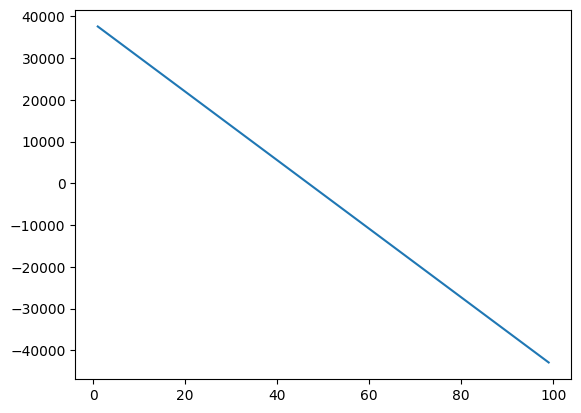

In [94]:
# we plot the data
plt.plot(new_input, yhat)
plt.show()